---
# Uber-Project

---

In [1]:
import datetime as dt
import pandas_profiling
import pandas as pd
import numpy as np
import seaborn as sas
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs ,init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
%matplotlib inline
sas.set()

In [706]:
Uber_jan_feb = pd.read_csv('H:/PYTHON/python for data science/s11-project/uber/Uber-Jan-Feb-FOIL.csv',parse_dates=['date'],dtype={'active_vehicles':'i','trips':'i','dispatching_base_number':'string'})
American = pd.read_csv('H:/PYTHON/python for data science/s11-project/uber/other-American_B01362.csv',usecols=['DATE','TIME','PICK UP ADDRESS'])
Carmel = pd.read_csv('H:/PYTHON/python for data science/s11-project/uber/other-Carmel_B00256.csv' , encoding=('ISO-8859-1'))

---
## ASK
---

__1-How many unique number of dispatching base number ?__

__2-What is the most dispatching base number achives trips ?__

__3-What is the most commen month has trips ?__

__4-What is the most commen day has trips ?__

__5-Does the number of vehicles affects on number of trips ?__

__6-What is the total number of trips ?__

__7-How many vehicles we have in this period ?__

__8-What is the average trips per month and day ?__

__9-What is the most dispatching base number has vehicles ?__

__10-How many dispatching base number we have ?__


__11-What is the most commen month people ask for trips ?__

__12-What is the most commen day people ask for trips ?__

__13-Total number of each kind of trips ?__

__14-Total number of each status of vehicles's number ?__

__15-How many vehicles for each status of vehicles's number and kind of trips ?__

__16-How many trips for each status of vehicles's number and kind of trips ?__

__17-What is the average and total of trips for each week ?__

__18-How many people ask for a trip AM or PM ?__

__19-How many unique address we have ?__

__20-Is there a particular time people ask for trips?__

__21-What is the most day people asked trips in it__

__31-What is the number of trips for each day?__

__32-What is the number of trips for each month?__

__33-What is the number of trips for each week?__

__34-What are the most regions asked for trips?__

__35-Is there regions asked for trips only AM or  PM?__

__36-What is the most period people ask for trips in it?__

__37-What is the total number of trips?__

__39-What is the average of number trips by day, month, week, hour and minute ?__

__40-What is the top 10 address that has asked for trips and the lowest 10?__

__41-What is the total of number trips by day, month, week, hour and minute ?__

---
## Data Cleaning and Preprocessing
---


In [707]:
Uber_jan_feb['days'] = Uber_jan_feb.date.dt.day_name()
Uber_jan_feb['months'] = Uber_jan_feb.date.dt.month_name()
Uber_jan_feb['weeks'] = Uber_jan_feb.date.dt.day_of_week



In [708]:
Uber_jan_feb.describe()

,active_vehicles,trips,weeks
count,354.000000,354.000000,354.000000
mean,1307.435028,11667.316384,3.050847
std,1162.510626,10648.284865,1.972247
min,112.000000,629.000000,0.000000
25%,296.750000,2408.500000,1.000000
50%,1077.000000,9601.000000,3.000000
75%,1417.000000,13711.250000,5.000000
max,4395.000000,45858.000000,6.000000


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

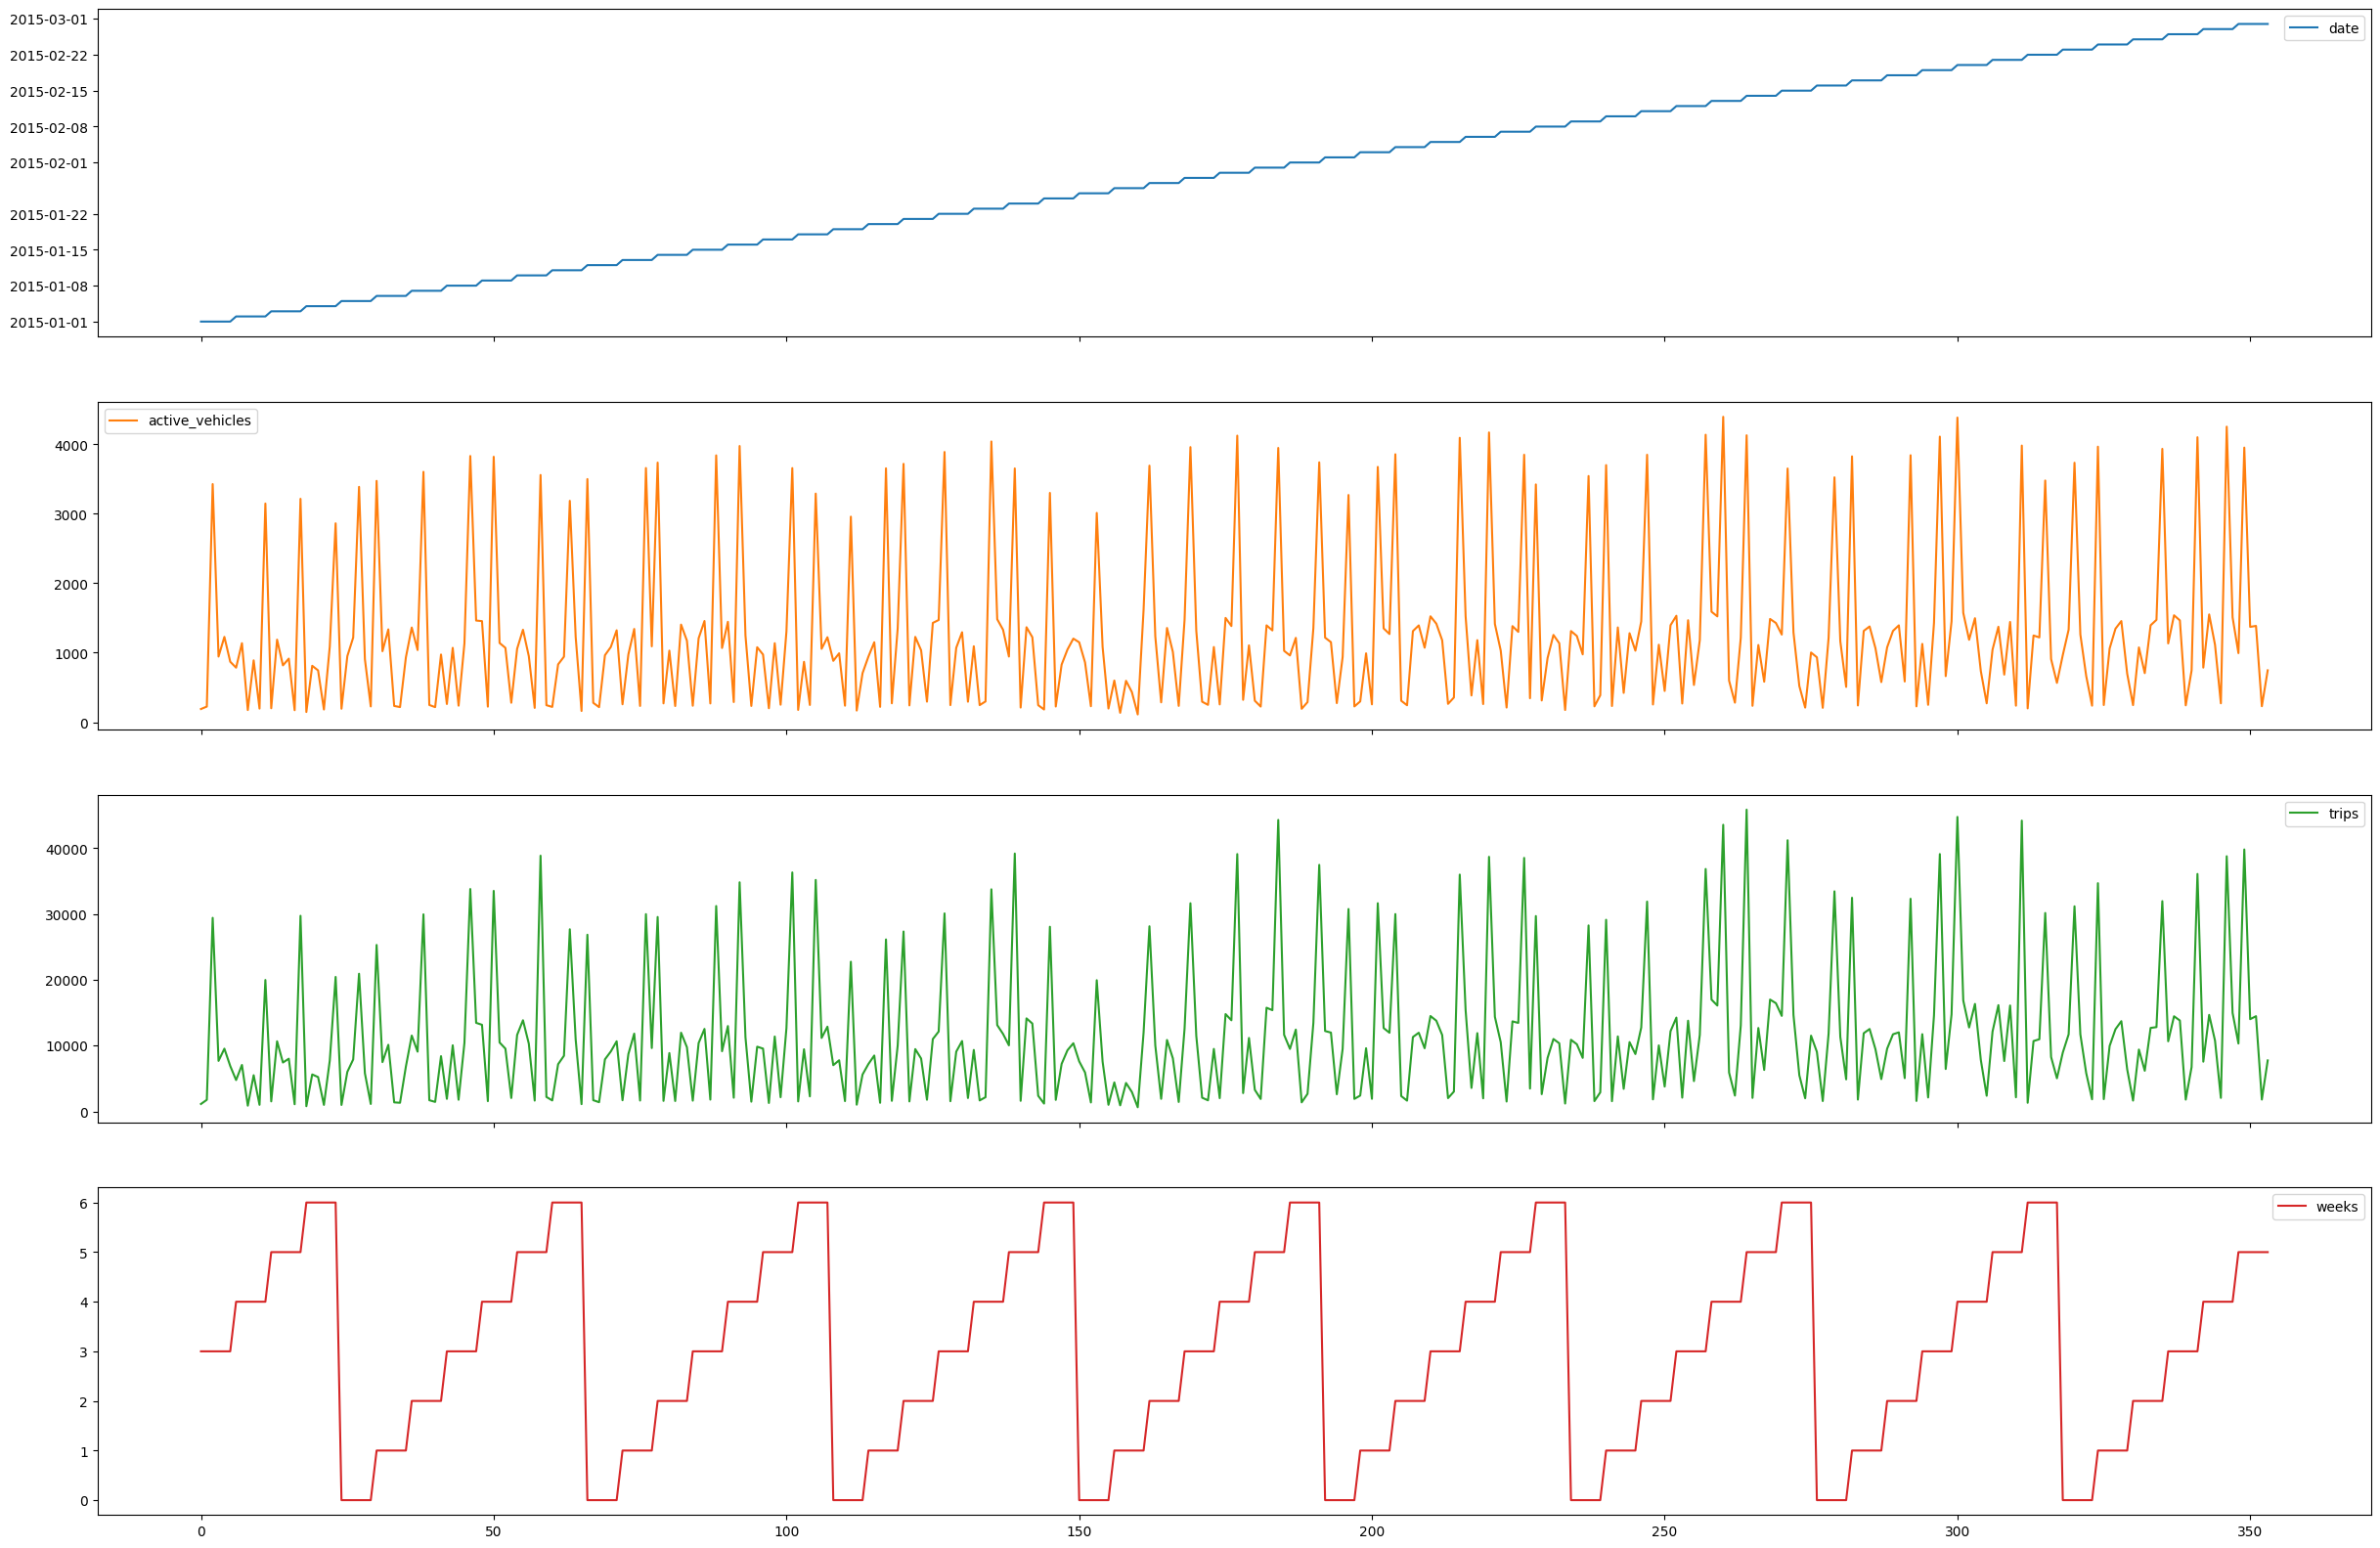

In [709]:
Uber_jan_feb.plot(subplots=True , figsize=(30,20))

In [710]:
Uber_jan_feb['status_of_vehicles\'s_number'] = pd.cut(Uber_jan_feb.trips , bins=[0,10000,20000,30000,50000] , labels=['Low' , 'Medium' ,'High' ,'Higher'])

In [711]:
Uber_jan_feb['Kind_of_trips'] = pd.cut(Uber_jan_feb.trips , bins=[0,10000,20000,30000,50000] , labels=['Bad' , 'Normal' ,'Good' ,'Best'])

---
## Analysis and Visualization
---

__1-How many unique number of dispatching base number ?__

In [736]:
q_1 = pd.Series(Uber_jan_feb.dispatching_base_number.nunique())
q_1 = pd.DataFrame(q_1)
q_1



,0
0,6


__2-What is the most dispatching base number achives trips ?__

In [737]:
q_2 = Uber_jan_feb.groupby('dispatching_base_number').agg(number_of_trips =('trips','sum')).sort_values(by='number_of_trips' , ascending=False).reset_index()
q_2


,dispatching_base_number,number_of_trips
0,B02764,1914449
1,B02617,725025
2,B02682,662509
3,B02598,540791
4,B02765,193670
5,B02512,93786


__3-What is the most commen month has trips ?__

In [738]:
q_3 = Uber_jan_feb.groupby('months').agg(number_of_trips =('trips','sum')).sort_values(by='number_of_trips' , ascending=False).reset_index()
q_3


,months,number_of_trips
0,February,2221581
1,January,1908649


In [739]:
qq_3 = Uber_jan_feb.groupby('months').agg(number_of_trips =('trips','mean')).sort_values(by='number_of_trips' , ascending=False).reset_index()
qq_3



,months,number_of_trips
0,February,13223.696429
1,January,10261.553763


__4-What is the most commen day has trips ?__

In [740]:
q_4 = Uber_jan_feb.groupby('days').agg(number_of_trips =('trips','sum')).sort_values(by='number_of_trips' , ascending=False).reset_index()
q_4


,days,number_of_trips
0,Saturday,751325
1,Friday,711192
2,Thursday,665647
3,Wednesday,531263
4,Sunday,523943
5,Tuesday,483061
6,Monday,463799


In [741]:
qq_4 = Uber_jan_feb.groupby('days').agg(number_of_trips =('trips','mean')).sort_values(by='number_of_trips' , ascending=False).reset_index()
qq_4


,days,number_of_trips
0,Saturday,13913.425926
1,Friday,13170.222222
2,Thursday,12326.796296
3,Wednesday,11067.979167
4,Sunday,10915.479167
5,Tuesday,10063.770833
6,Monday,9662.479167


__5-Does the number of vehicles affects on number of trips ?__

In [742]:
Uber_jan_feb['vehicles_affects_trips'] = np.where(Uber_jan_feb['active_vehicles'] < Uber_jan_feb['trips'], 'no' ,'yes')

In [743]:
q_5 = Uber_jan_feb[Uber_jan_feb['vehicles_affects_trips'] == 'no']

In [744]:
qq_5 = Uber_jan_feb[['active_vehicles','trips']].corr()
qq_5 



,active_vehicles,trips
active_vehicles,1.000000,0.980493
trips,0.980493,1.000000


<AxesSubplot:>

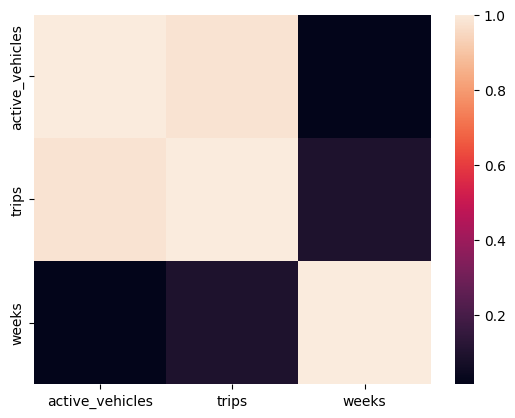

In [745]:
sas.heatmap(Uber_jan_feb.corr())

__6-What is the total number of trips ?__

In [746]:
q_6 = pd.Series(Uber_jan_feb.trips.sum())
q_6 = pd.DataFrame(q_6)
q_6 


,0
0,4130230


__7-How many vehicles we have in this period ?__

In [747]:
q_7 = pd.Series(Uber_jan_feb.active_vehicles.sum())
q_7 = pd.DataFrame(q_6)
q_7


,0
0,4130230


__8-What is the average and total of trips for each day ?__

In [748]:
q_8 = Uber_jan_feb.set_index('date')
q_8 = pd.DataFrame(round(q_8.loc[:,'trips'].resample('D').mean())).reset_index()
q_8.trips = q_8.trips.astype('i')
q_8




,date,trips
0,2015-01-01,9406
1,2015-01-02,6532
2,2015-01-03,9742
3,2015-01-04,6800
4,2015-01-05,7125
5,2015-01-06,8738
6,2015-01-07,10350
7,2015-01-08,11902
8,2015-01-09,11716
9,2015-01-10,13081


In [749]:
q_8 = Uber_jan_feb.set_index('date')
q_8 = pd.DataFrame(round(q_8.loc[:,'trips'].resample('D').sum())).reset_index()
q_8


,date,trips
0,2015-01-01,56437
1,2015-01-02,39189
2,2015-01-03,58449
3,2015-01-04,40798
4,2015-01-05,42752
5,2015-01-06,52426
6,2015-01-07,62102
7,2015-01-08,71413
8,2015-01-09,70296
9,2015-01-10,78484


__9-What is the most dispatching base number has vehicles ?__

In [750]:
q_9 = Uber_jan_feb.groupby('dispatching_base_number').agg(Total_numberof_vehicles = ('active_vehicles','sum')).sort_values(by = 'Total_numberof_vehicles' , ascending = False).reset_index()
q_9

,dispatching_base_number,Total_numberof_vehicles
0,B02764,217290
1,B02617,79758
2,B02682,71431
3,B02598,58653
4,B02765,22575
5,B02512,13125


__10-How many dispatching base number we have ?__

In [751]:
q_10 = pd.Series(Uber_jan_feb['dispatching_base_number'].value_counts())
q_10 = pd.DataFrame(q_10).reset_index()
q_10.columns = ['dispatching_base_number','number_of_dispatching']
q_10

,dispatching_base_number,number_of_dispatching
0,B02512,59
1,B02765,59
2,B02764,59
3,B02682,59
4,B02617,59
5,B02598,59


__11-What is the most commen month people ask for trips ?__

In [752]:
q_11 =pd.DataFrame( Uber_jan_feb.months.value_counts()).reset_index()
q_11.columns = ['months','number_of_people']
q_11

,months,number_of_people
0,January,186
1,February,168


__12-What is the most commen day people ask for trips ?__


In [753]:
q_12 =pd.DataFrame( Uber_jan_feb.days.value_counts()).reset_index()
q_12.columns = ['days','number_of_people']
q_12

,days,number_of_people
0,Thursday,54
1,Friday,54
2,Saturday,54
3,Sunday,48
4,Monday,48
5,Tuesday,48
6,Wednesday,48


__13-Total number of each kind of trips ?__

In [754]:
q_13 = pd.Series(Uber_jan_feb['Kind_of_trips'].value_counts())
q_13 = pd.DataFrame(q_13).reset_index()
q_13.columns = ["Kind_of_tripsr" , 'number_of_Kind_of_trips']
q_13

,Kind_of_tripsr,number_of_Kind_of_trips
0,Bad,182
1,Normal,116
2,Best,37
3,Good,19


__14-Total number of each status of vehicles's number ?__

In [755]:
q_14 = pd.Series(Uber_jan_feb['status_of_vehicles\'s_number'].value_counts())
q_14 = pd.DataFrame(q_14).reset_index()
q_14.columns = ["status_of_vehicles's_number" , 'number_of_status']
q_14

,status_of_vehicles's_number,number_of_status
0,Low,182
1,Medium,116
2,Higher,37
3,High,19


__15-How many vehicles for each status of vehicles's number and kind of trips ?__

In [756]:
q_15 = Uber_jan_feb.pivot_table(index=['status_of_vehicles\'s_number','Kind_of_trips'] , values= 'active_vehicles' , aggfunc='sum').reset_index()
q_15 = q_15[q_15.active_vehicles > 10]
q_15

,status_of_vehicles's_number,Kind_of_trips,active_vehicles
0,Low,Bad,97906
5,Medium,Normal,155414
10,High,Good,65889
15,Higher,Best,143623


__16-How many trips for each status of vehicles's number and kind of trips ?__

In [757]:
q_16 = Uber_jan_feb.pivot_table(index=['status_of_vehicles\'s_number','Kind_of_trips'] , values= 'trips' , aggfunc='sum').reset_index()
q_16 = q_16[q_16.trips > 10]
q_16

,status_of_vehicles's_number,Kind_of_trips,trips
0,Low,Bad,798320
5,Medium,Normal,1469373
10,High,Good,519343
15,Higher,Best,1343194


__17-What is the average and total of trips for each week ?__

In [758]:
q_17 = Uber_jan_feb.set_index('date')
q_17 = pd.DataFrame(q_17.loc[:,'trips'].resample('W').sum()).reset_index()
q_17

,date,trips
0,2015-01-04,194873
1,2015-01-11,434499
2,2015-01-18,469519
3,2015-01-25,435699
4,2015-02-01,450969
5,2015-02-08,517013
6,2015-02-15,570196
7,2015-02-22,571884
8,2015-03-01,485578


In [759]:
qq_17 = Uber_jan_feb.set_index('date')
qq_17 = pd.DataFrame(round(qq_17.loc[:,'trips'].resample('w').mean())).reset_index()
qq_17

,date,trips
0,2015-01-04,8120.0
1,2015-01-11,10345.0
2,2015-01-18,11179.0
3,2015-01-25,10374.0
4,2015-02-01,10737.0
5,2015-02-08,12310.0
6,2015-02-15,13576.0
7,2015-02-22,13616.0
8,2015-03-01,13488.0


In [760]:
Uber_jan_feb.to_csv('Uber_data_sets/Uber_jan_feb.csv')

In [761]:
px.scatter(Uber_jan_feb, 
x = 'trips' , 
y = 'active_vehicles' , 
size='trips' , 
color='Kind_of_trips' ,
animation_frame='days' ,
animation_group='trips',
template='plotly_dark' ,
labels={'active_vehicles':'vehicles'} ,
height=1000 ,
)